In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("expenses.csv")

try:
    refill_index = df[df["Date"] == "refiil"].index[-1]
    df = df.loc[refill_index + 1 :]
except:
    pass
df

,Date,Amount,Item,Category,Split,Not Me
0,2024-04-04,25,maggie,food,2,0
1,2024-04-05,60,mogu-mogu,food,2,0
2,2024-04-05,40,ocean,food,2,0
3,2024-04-05,1224,brindavan,utility,1,0
4,2024-04-05,117,flowers,utility,1,0
5,2024-04-05,27,curd,utility,1,0
6,2024-04-06,90,honeychilli,food,2,0
7,2024-04-06,60,ocean,food,2,0
8,2024-04-06,203,vegetables,utility,1,0
9,2024-04-06,180,pasta,utility,1,0


categorical

In [2]:
d = df[["Category", "Amount", "Split", "Not Me"]]
d = d.drop(d[d["Not Me"] == 1].index)
d["Amount"] = d["Amount"] / d["Split"]
d.drop(["Split", "Not Me"], axis=1, inplace=True)
d = d.groupby("Category").sum()
d


,Amount
Category,
food,530.0
travel,292.0
utility,2879.0


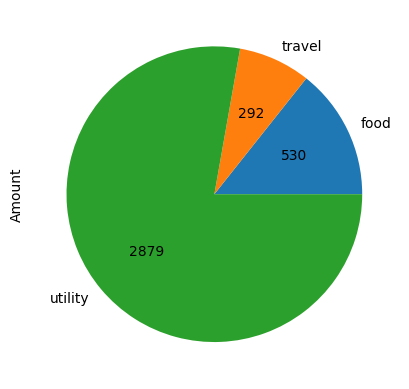

In [3]:
def absolute_value(val):
    return int(round(val / 100.0 * d["Amount"].sum()))

d["Amount"].plot(kind="pie", autopct=absolute_value)
plt.show()

date wise

In [4]:
d = df[["Date", "Amount"]].groupby("Date").sum()
d

,Amount
Date,
2024-04-04,25
2024-04-05,1468
2024-04-06,533
2024-04-07,672
2024-04-08,1025
2024-04-09,180
2024-04-10,157
2024-04-12,190
2024-04-14,230


<Axes: xlabel='Date'>

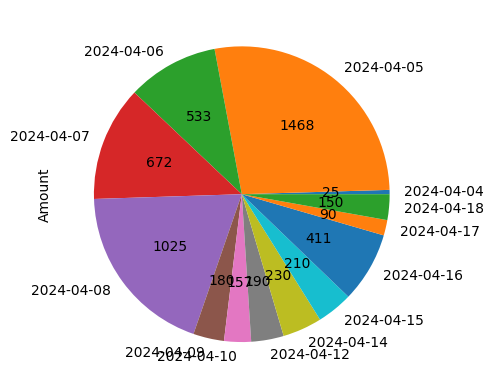

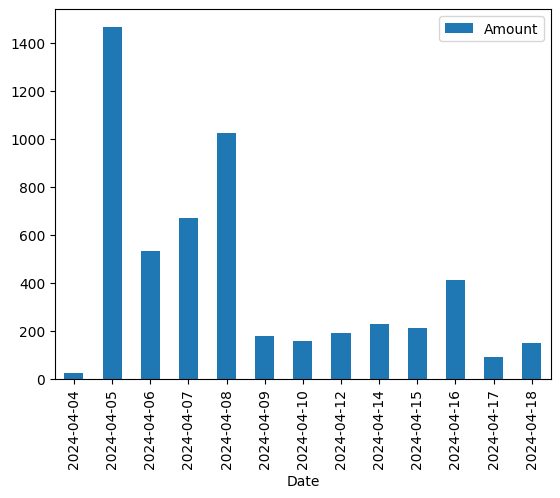

In [5]:
d.plot(kind="pie", y="Amount", autopct=absolute_value, legend=False)
d.plot(kind="bar")

owed

In [6]:
d = df[["Amount", "Split", "Not Me"]]
s = d[d["Not Me"] == 1]
d = d.drop(s.index)
sum1 = s["Amount"].sum()
sum2 = (d["Amount"] - (d["Amount"] / d["Split"])).sum()
print(sum1 + sum2)

1640.0
